In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Downloading locally
- The easiest way to install diad fit is by removing the #, and running this once per computer. When I update the code, you'll need to get the new tag off GitHub:
https://github.com/PennyWieser/DiadFit/tags
Right click on the top one, over the 'zip' icon, click copy link address
- If youve already done this for Ne, you dont need to do here too

In [2]:
#!pip install --upgrade "https://github.com/PennyWieser/DiadFit/archive/refs/tags/0.0.11.zip"

### This imports DiadFit, and gives you the version. In all communication with Penny, make sure you say the version!


In [3]:
import DiadFit as pf
pf.__version__

'0.0.37'

In [4]:
import os
DayFolder=os.getcwd()
meta_path=DayFolder +  '\MetaData'
spectra_path=DayFolder + '\Spectra'

In [5]:
# This specifies what file type your Raman exported in. 
filetype='headless_txt' # Specifies raman file format 
file_ext='.txt'
prefix=False

## This function finds all files in your path with the specified file format
- As you will fit your Ne lines in a different workbook, you can use 'exclude_str' to put any text that appears in all your Ne files, and it won't look here

In [6]:
Diad_files=pf.get_diad_files(path=spectra_path, file_ext=file_ext, 
                            exclude_str='N',
                            exclude_str_2='FG04',
                             exclude_str_3='Sub BG',
                            exclude_str_4='Cap')
Diad_files[0:5]

['02 MP2_53_100X_FIA_12mW.txt',
 '05 MP2_53_100X_FIB_12mW.txt',
 '06 MP2_53_100X_FID_12mW.txt',
 '08 MP2_53_100X_FIC_12mW.txt',
 '10 MP2_55_100X_FIA_12mW.txt']

In [35]:
diad_id_config=pf.diad_id_config(height=10,  distance=10, 
                                 prominence=20)
diad_id_config

diad_id_config(exclude_range1=None, exclude_range2=None, approx_diad2_pos=(1379, 1395), approx_diad1_pos=(1275, 1290), Diad2_window=(1349, 1425), Diad1_window=(1245, 1320), approx_diad2_pos_3peaks=(1379, 1395, 1362), height=10, distance=10, threshold=0.5, width=0.5, prominence=20, plot_figure=True)

didnt find C13 in convoluted way
[1282.37]


,Diad2_pos,Diad2_height,HB2_pos,HB2_height,C13_pos,C13_height,Diad1_pos,Diad1_height,HB1_pos,HB1_height,Diad1_Median_Bck,Diad2_Median_Bck,Diad1_prom,Diad2_prom,HB1_prom,HB2_prom,approx_split,C13_prom,C13_HB2_prom_ratio
0,1388.56,801.0,NaN,NaN,NaN,NaN,1282.37,807.0,NaN,NaN,795.0,773.66675,12.0,27.33325,NaN,NaN,106.19,NaN,NaN


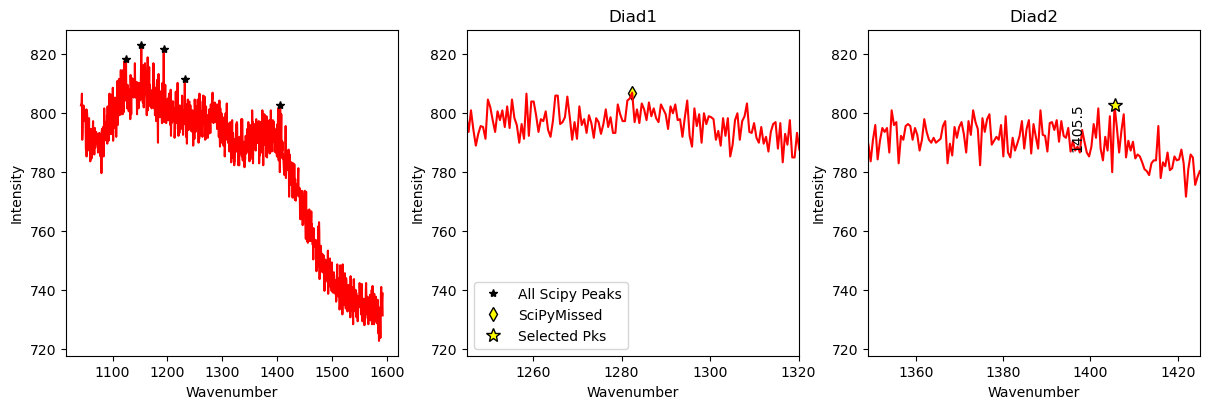

In [42]:


df_peaks, Diad=pf.identify_diad_peaks_2(
    config=diad_id_config, path=spectra_path, filename=Diad_files[9],
filetype=filetype, plot_figure=True)

df_peaks.head()

In [39]:
len(Diad_files)

20

In [74]:
fit_params = pd.DataFrame([])
x_cord=Diad[:, 0]
data_y_all=np.empty([  len(x_cord), len(Diad_files)], float)

#data=pd.DataFrame([])
i=0
for file in Diad_files:
    print('working on file'+str(i))
    
    
    df_peaks, Diad=pf.identify_diad_peaks_2(
    config=diad_id_config, path=spectra_path, filename=file,
filetype=filetype, plot_figure=False)
    
    data_y_all[:, i]=Diad[:, 1]
    #data = pd.concat([Diad, data], axis=0)
    fit_params = pd.concat([fit_params, df_peaks], axis=0)
    i=i+1
fit_params=fit_params.reset_index(drop=True)



working on file0
working on file1
working on file2
working on file3
working on file4
working on file5
working on file6
didnt find C13 in convoluted way
[1275.32]
working on file7
working on file8
working on file9
didnt find C13 in convoluted way
[1282.37]
working on file10
working on file11
working on file12
working on file13
working on file14
working on file15
working on file16
working on file17
working on file18
working on file19


In [75]:
fit_params.head()

,filename,Diad2_pos,Diad2_height,HB2_pos,HB2_height,Diad2_HB2_Valley_prom,C13_pos,C13_height,Diad1_pos,Diad1_height,...,Diad1_HB1_Valley_prom,Diad1_Median_Bck,Diad2_Median_Bck,Diad1_prom,Diad2_prom,HB1_prom,HB2_prom,approx_split,C13_prom,C13_HB2_prom_ratio
0,02 MP2_53_100X_FIA_12mW.txt,1388.56,1205.330,1410.28,710.667,1.3330,NaN,NaN,1285.08,951.00,...,-2.1670,669.5000,667.50000,281.5000,537.83000,23.000,43.6670,103.48,NaN,NaN
1,05 MP2_53_100X_FIB_12mW.txt,1388.56,1493.670,1409.75,746.333,0.1665,NaN,NaN,1285.08,1130.33,...,-1.5000,696.6665,693.66675,433.6635,800.00325,28.000,53.9995,103.48,NaN,NaN
2,06 MP2_53_100X_FID_12mW.txt,1388.56,1362.670,1409.75,757.000,-1.6670,NaN,NaN,1285.62,1052.00,...,2.3335,710.5000,705.00000,341.5000,657.67000,31.667,53.6670,102.94,NaN,NaN
3,08 MP2_53_100X_FIC_12mW.txt,1388.56,1353.670,1409.75,736.333,2.1660,NaN,NaN,1285.08,1049.67,...,2.8335,696.5000,692.08325,353.1700,661.58675,24.666,46.4995,103.48,NaN,NaN
4,10 MP2_55_100X_FIA_12mW.txt,1388.56,773.667,NaN,NaN,NaN,NaN,NaN,1285.08,746.00,...,NaN,703.5000,701.66650,42.5000,72.00050,NaN,NaN,103.48,NaN,NaN


In [76]:
fit_params['has_HB2']=0
fit_params.loc[(fit_params['HB2_height']>0)&(fit_params['HB2_prom']>0), 'has_HB2']=1

fit_params['has_HB1']=0
fit_params.loc[(fit_params['HB1_height']>0)&(fit_params['HB1_prom']>0), 'has_HB1']=1


### Filter out ones that dont have a reasonable splitting at all - e.g. likely no diads

Text(0.5, 1.0, 'Discarded based on splitting and Diad1 intensity')

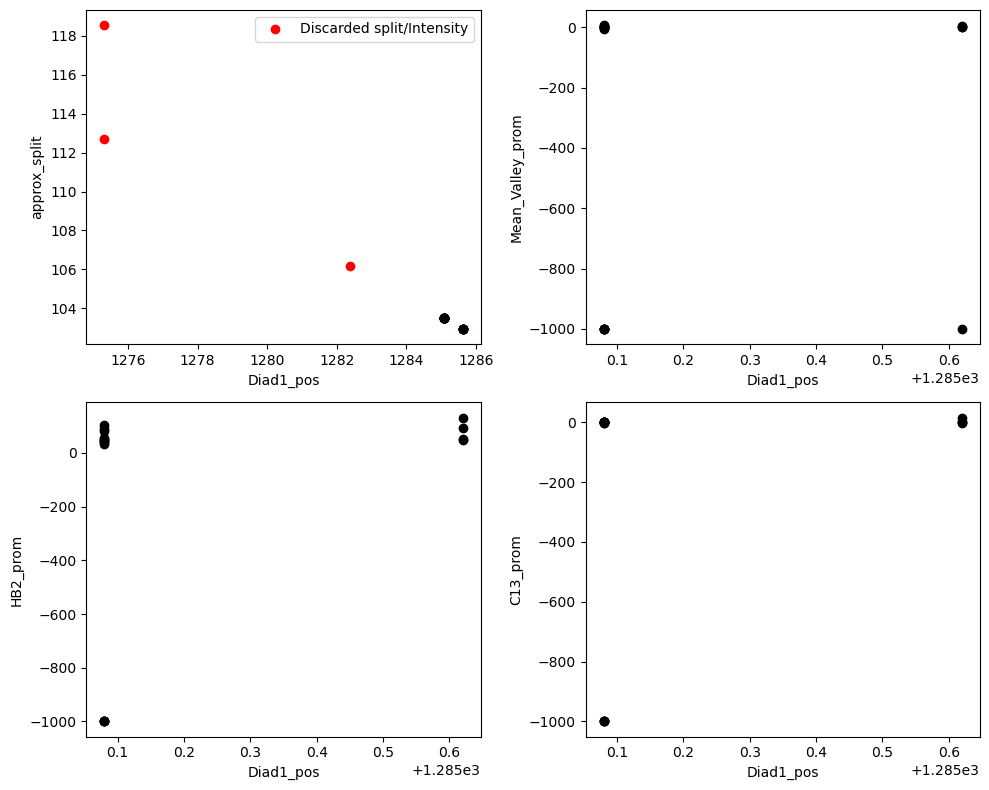

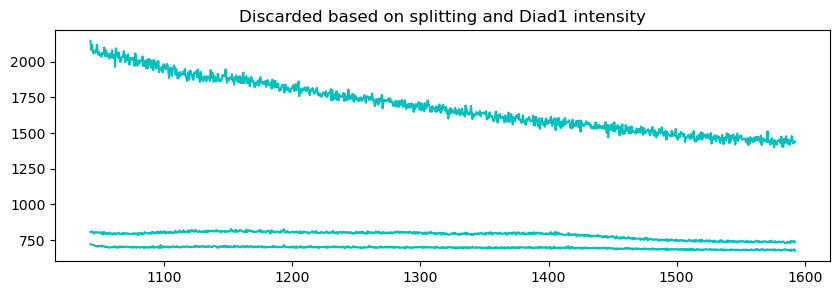

In [80]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8))

var1='Diad1_pos' #Diad1 position moves more, so we want this
var2='Diad2_pos'
var3='approx_split'
fit_params['Mean_Valley_prom']=(fit_params['Diad2_HB2_Valley_prom']+fit_params['Diad1_HB1_Valley_prom'])
fit_params['Mean_HB_prom']=(fit_params['HB1_prom']+fit_params['HB2_prom'])
var4='Mean_Valley_prom'
var5='HB2_prom'
var6='C13_prom'
var7='Diad2_HB2_Valley_prom'
fit_params_nona=fit_params.fillna(-1000)
reas_split=(fit_params_nona['approx_split'].between(101, 107))
reas_heigh=fit_params_nona['Diad1_prom']>40
fit_params2=fit_params_nona.loc[reas_split&reas_heigh].reset_index(drop=True)
disc_fit_params=fit_params_nona.loc[~(reas_split&reas_heigh)].reset_index(drop=True)

data_y=data_y_all[:, reas_split&reas_heigh]
disc_y=data_y_all[:, ~(reas_split&reas_heigh)]
## Set boundaries

ax1.plot(fit_params_nona[var1], fit_params_nona[var3],  'or', label='Discarded split/Intensity')
ax1.legend()
ax1.plot(fit_params2[var1], fit_params2[var3],  'ok') 
ax1.set_xlabel(var1)
ax1.set_ylabel(var3)
ax2.plot(fit_params2[var1], fit_params2[var4],  'ok')
ax2.set_xlabel(var1)
ax2.set_ylabel(var4)
ax3.plot(fit_params2[var1], fit_params2[var5],  'ok')
ax3.set_xlabel(var1)
ax3.set_ylabel(var5)
ax4.plot(fit_params2[var1], fit_params2[var7],  'ok')
ax4.set_xlabel(var1)
ax4.set_ylabel(var6)
fig.tight_layout()

fig, (ax1) = plt.subplots(1, 1, figsize=(10,3))
for i in range(0, np.shape(disc_y)[1]):    
    av_prom_disc=np.abs(np.nanmedian(disc_fit_params['Diad1_prom'])/intc)
    ax1.plot(x_cord, disc_y[:, i]+av_prom_disc*3*i, '-c') 
ax1.set_title('Discarded based on splitting and Diad1 intensity')

## Identify weakest group using the ratio of diad2 prominance to HB2 prominance

Grp1, N=17


Text(0, 0.5, 'Diad1_pos')

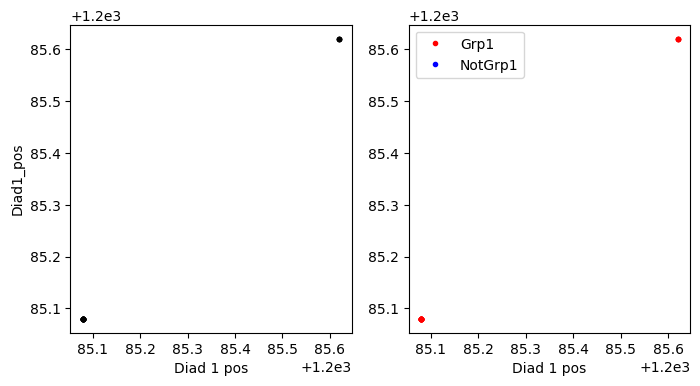

In [83]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
# Remember, lower Peak1 position = stronger diad
fit_params2['HB_height_prom']=fit_params2['Diad2_prom']/fit_params2['HB2_prom']
var4='Diad1_pos'
ax1.plot(fit_params2[var1], fit_params2[var4],  '.k')
lim_1=1200
if var4 =='Diad1_pos':
    grp1=fit_params2[var4]>lim_1
else:
    grp1=fit_params2[var4]<lim_1
fit_params2_notgrp1=fit_params2.loc[~grp1]
ax2.plot(fit_params2[var1].loc[grp1], fit_params2[var4].loc[grp1],  '.r', label='Grp1')
ax2.plot(fit_params2[var1].loc[~grp1], fit_params2[var4].loc[~grp1],  '.b', label='NotGrp1')
ax2.legend()
ax1.ticklabel_format(useOffset=1200)
ax2.ticklabel_format(useOffset=1200)
print('Grp1, N=' + str(sum(grp1)))
ax1.set_xlabel('Diad 1 pos')
ax2.set_xlabel('Diad 1 pos')
ax1.set_ylabel(var4)

## Now plot group 1 vs the ones that didnt make grp1

(1230.0, 1450.0)

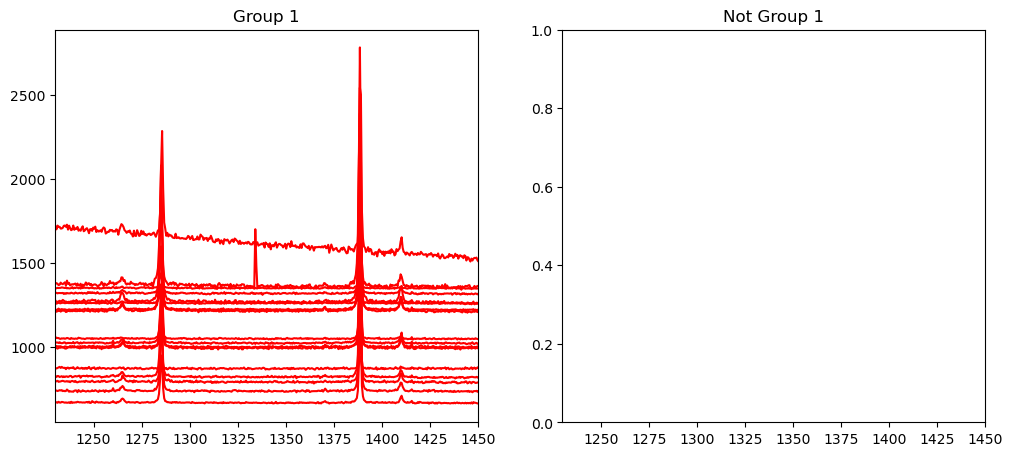

In [84]:
import matplotlib.pyplot as plt
## Find ones in group1, in dataframe and numpy form
Group1_df=fit_params2.loc[grp1]
index_Grp1=Group1_df.index
Group1_np_y=data_y[:, index_Grp1]

# 

Groupnot1_df=fit_params2.loc[~grp1]
index_Grpnot1=Groupnot1_df.index
Groupnot1_np_y=data_y[:, index_Grpnot1]

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 0.3*len(fit_params2)), sharex=True)
intc=8
# 
for i in range(0, np.shape(Group1_np_y)[1]):
    av_prom_Group1=np.abs(np.nanmedian(Group1_df['Diad1_prom'])/intc)
    ax0.plot(x_cord, Group1_np_y[:, i]+av_prom_Group1*i, '-r') 
    
for i in range(0, np.shape(Groupnot1_np_y)[1]):    
    av_prom_Groupnot1=np.abs(np.nanmedian(Groupnot1_df['Diad1_prom'])/intc)
    ax1.plot(x_cord, Groupnot1_np_y[:, i]+av_prom_Groupnot1*3*i, '-c') 

#ax1.set_ylim([0, av_prom*i])
ax0.set_title('Group 1')
ax1.set_title('Not Group 1')
ax1.set_xlim([1230, 1450])

## Now lets subdivide the denser ones

Grp2, N=0
Grp3, N=0


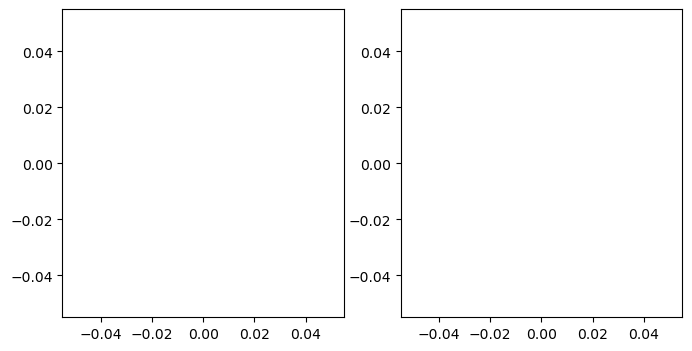

In [85]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))

var_d='C13_prom'
ax1.plot(fit_params2_notgrp1[var1], fit_params2_notgrp1[var_d],  '.c')
lim_2=250
grp2=(fit_params2[var_d]<lim_2)&(~grp1)
grp3=(fit_params2[var_d]>=lim_2)&(~grp1)
ax2.plot(fit_params2[var1].loc[grp2], fit_params2[var_d].loc[grp2],  '.b')
ax2.plot(fit_params2[var1].loc[grp3], fit_params2[var_d].loc[grp3],  '.k')
print('Grp2, N=' + str(sum(grp2)))
print('Grp3, N=' + str(sum(grp3)))


(1230.0, 1450.0)

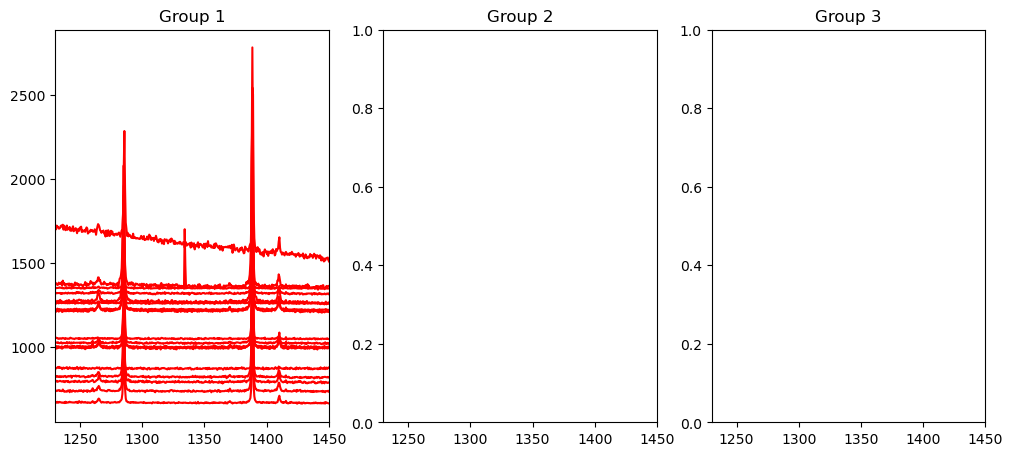

In [86]:
import matplotlib.pyplot as plt
## Find ones in group1, in dataframe and numpy form
Group1_df=fit_params2.loc[grp1]
index_Grp1=Group1_df.index
Group1_np_y=data_y[:, index_Grp1]

Group2_df=fit_params2.loc[grp2]
index_Grp2=Group2_df.index
Group2_np_y=data_y[:, index_Grp2]

Group3_df=fit_params2.loc[grp3]
index_Grp3=Group3_df.index
Group3_np_y=data_y[:, index_Grp3]




fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(12, 0.3*len(fit_params2)), sharex=True)
intc=8
for i in range(0, np.shape(Group1_np_y)[1]):
    av_prom_Group1=np.abs(np.nanmedian(Group1_df['Diad1_prom'])/intc)
    ax0.plot(x_cord, Group1_np_y[:, i]+av_prom_Group1*i, '-r') 
    
for i in range(0, np.shape(Group2_np_y)[1]):
    av_prom_Group2=np.abs(np.nanmedian(Group2_df['Diad1_prom'])/intc)
    ax1.plot(x_cord, Group2_np_y[:, i]+av_prom_Group2*i, '-b') 
    
for i in range(0, np.shape(Group3_np_y)[1]):
    av_prom_Group3=np.abs(np.nanmedian(Group3_df['Diad1_prom'])/intc)
    ax2.plot(x_cord, Group3_np_y[:, i]+av_prom_Group3*i, '-k') 
 

#ax1.set_ylim([0, av_prom*i])
ax0.set_title('Group 1')
ax1.set_title('Group 2')
ax2.set_title('Group 3')
ax1.set_xlim([1230, 1450])

## Now lets save these lists, and we load them in another notebook

In [88]:
import joblib

# Dumps dataframes
joblib.dump(Group1_df, 'Group1_df.sav')
joblib.dump(Group2_df, 'Group2_df.sav')
joblib.dump(Group3_df, 'Group3_df.sav')
# Dumps actual nupmy data

joblib.dump(Group1_np_y, 'Group1_np.sav')
joblib.dump(Group2_np_y, 'Group2_np.sav')
joblib.dump(Group3_np_y, 'Group3_np.sav')
joblib.dump(x_cord, 'np_x.sav')

['np_x.sav']